# Simple portal frame design based on Eurocodes
# (including sway imperfections)

### Jiri Mares, 12/2021

Portal frame on Fig.1 is designed from IPE sections. Loading qd and Fd is assumed to be design load (factored, i.e. includes partial safety factors).

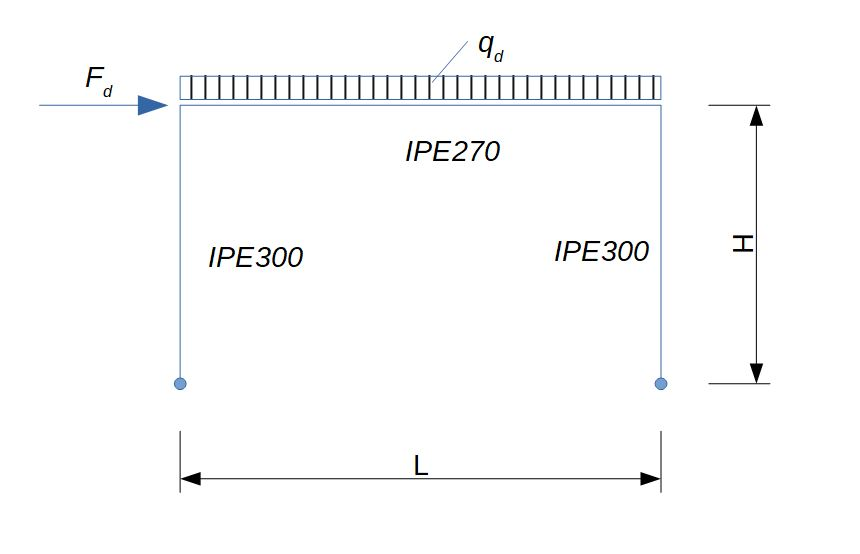

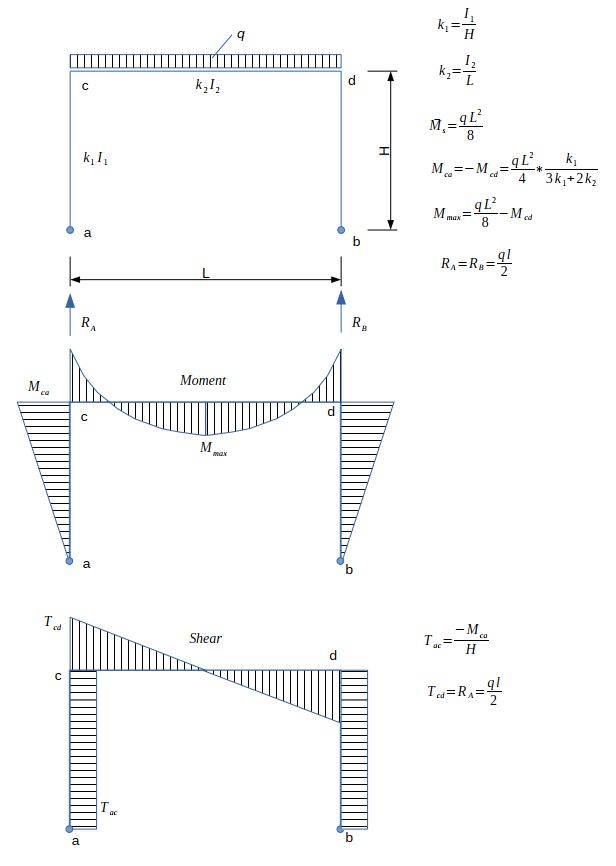

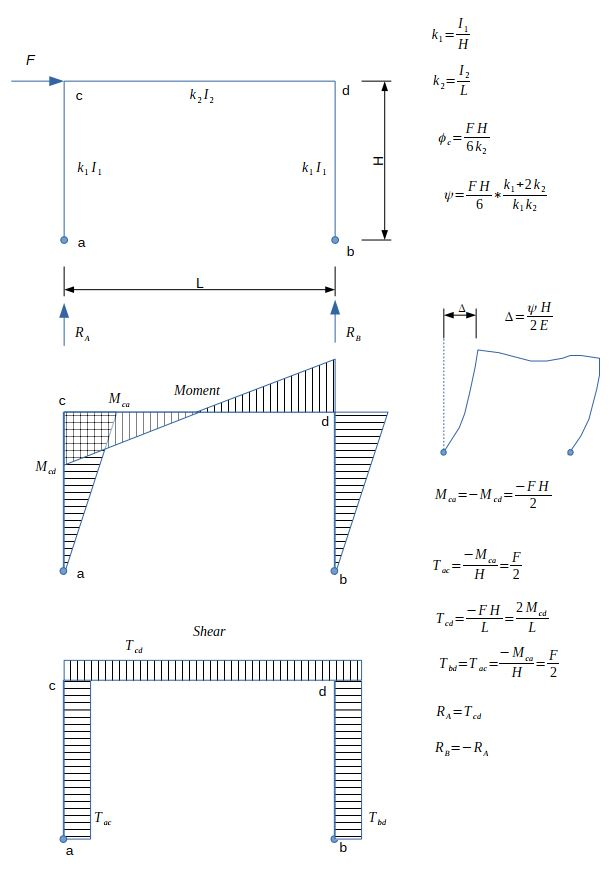

In [189]:
import math

In [190]:
# Portal frame dimensions (axial)
L = 5.6  #[m], Span
H = 4.3 #[m], Height

In [191]:
# Profiles
# Column
# IPE 300
Ac = 5381 #[mm^2], cross-sectional area
Iyc = 83560000 #[mm^4]
Wyc = 557000 #[mm^3]
Izc = 6038000 #[mm^4]
Itc = 201200
Iwc = 125900000000
zg = 0  #[m]
zj = 0  #[m]


# Rafter
# IPE 270
Ar = 4594 #[mm], cross-sectional area
Iyr = 57900000  #[mm^4]
Wyr = 429000  #[mm^3]
Izr = 4199000  #[mm^4]


# Material
E = 210000000 #[kPa]
G = 80700000  #[kPa]
fy = 275000
gammaM1 = 1

In [192]:
# Loading
# Total factored UDL on rafter
qd = 20 #[kN/m]
Fd = 20 #[kN]

In [193]:
# Frame imperfections
alpha_h = 2 / math.sqrt(H)
m = 2
alpha_m = math.sqrt(0.5 * (1 + 1/m))
phi0 = 1 / 200
phi = phi0 * alpha_h * alpha_m

# Equivalent horizontal force
EHF = qd * L * phi
k1 = Iyc * 10**(-12) / H
k2 = Iyr * 10**(-12)/ L 
psi_EHF = (EHF * H / 6) * ((k1 + 2*k2) / k1 / k2)
DELTA_EHF = psi_EHF * H / 2 / E

In [194]:
print("alpha_h                   = ", ("%2.2f" % alpha_h), " [-]")
print("alpha_m                   = ", ("%2.2f" % alpha_m), " [-]")
print("phi                       = ", ("%2.6f" % phi), " [-]")
print("EHF                       = ", ("%2.2f" % EHF), " [kN]")

print("k1                        = ", ("%2.6f" % k1), " [m^3]")
print("k2                        = ", ("%2.6f" % k2), " [m^3]")
print("psi_EHF                   = ", ("%2.6f" % psi_EHF), " [kNm]")
print("DELTA_EHF                 = ", ("%2.6f" % DELTA_EHF), " [m]")

alpha_h                   =  0.96  [-]
alpha_m                   =  0.87  [-]
phi                       =  0.004176  [-]
EHF                       =  0.47  [kN]
k1                        =  0.000019  [m^3]
k2                        =  0.000010  [m^3]
psi_EHF                   =  66923.094076  [kNm]
DELTA_EHF                 =  0.000685  [m]


In [195]:
# Forces in frame due to UDL on rafter
Ms_1 = qd * L**2 / 8
Mca_1 = (qd * L**2 / 4) * (k1 / (3*k1 + 2*k2))
Mcd_1 = -Mca_1
Mmaxr_1 = qd * L**2 / 8 - Mcd_1
RA_1 = qd * L / 2
RB_1 = RA_1

# Forces and deformations in frame due to  horizontal loading
Mca_2 = Fd * H / 2
Tcd = Fd * H / L
# Horizontal deformation of frame due to horizontal loading
psi_2 = (Fd * H / 6) * ((k1 + 2*k2) / k1 / k2)
DELTA_2 = psi_2 * H / 2 / E

In [196]:
print("Ms_1                      = ", ("%2.2f" % Ms_1), " [kNm]")
print("Mca_1                     = ", ("%2.2f" % Mca_1), " [kNm]")
print("Mcd_1                     = ", ("%2.2f" % Mcd_1), " [kNm]")
print("Mmaxr_1                   = ", ("%2.2f" % Mmaxr_1), " [kNm]")
print("RA_1                      = ", ("%2.2f" % RA_1), " [kN]")
print("RB_1                      = ", ("%2.2f" % RB_1), " [kN]")
print("Mca_2                     = ", ("%2.2f" % Mca_2), " [kNm]")
print("Tcd                       = ", ("%2.2f" % Tcd), " [kN]")
print("psi_2                     = ", ("%2.6f" % psi_2), " [kN]")
print("DELTA_2                   = ", ("%2.6f" % DELTA_2), " [m]")

Ms_1                      =  78.40  [kNm]
Mca_1                     =  38.58  [kNm]
Mcd_1                     =  -38.58  [kNm]
Mmaxr_1                   =  116.98  [kNm]
RA_1                      =  56.00  [kN]
RB_1                      =  56.00  [kN]
Mca_2                     =  43.00  [kNm]
Tcd                       =  15.36  [kN]
psi_2                     =  2861485.705341  [kN]
DELTA_2                   =  0.029296  [m]


In [197]:
# Horizontal deformation of frame due to horizontal load and EHF
DELTA = DELTA_EHF + DELTA_2

In [198]:
print("DELTA                     = ", ("%2.6f" % DELTA), " [m]")

DELTA                     =  0.029981  [m]


In [199]:
Hd = Fd + EHF
Vd = qd * L
alpha_cr = (Hd / Vd) * (H / DELTA)

In [200]:
print("alpha_cr                  = ", ("%2.2f" % alpha_cr), " [-]")

alpha_cr                  =  26.21  [-]


In [201]:
# Amplification factor
amp = 1 / (1 - 1 / alpha_cr)

In [202]:
errmsg = "Method is adequate."
if alpha_cr < 3:
    errmsg = "ERROR: alpha_cr out of limits."
if alpha_cr > 10:
    errmsg = "Linear elastic analysis is adequate."
    amp = 1
    
print(errmsg)

Linear elastic analysis is adequate.


In [203]:
print("amp                       = ", ("%2.3f" % amp), " [-]")

amp                       =  1.000  [-]


### Check minimum rotational stiffness to justify model used in analysis of forces (fixed column-rafter connection).

In [204]:
kb = 24
Sjini = kb * E * Iyr * 10**(-12) / L

In [205]:
print("Sjini                     = ", ("%2.3f" % Sjini), " [kNm/rad]")

Sjini                     =  52110.000  [kNm/rad]


## Strength and stability of the column

### Flexural buckling of column

In [206]:
Lcry = 1000 * H
Lcrz = 1000 * H

In [207]:
# radius of gyration
i_y = 0 if Ac == 0 else math.sqrt(Iyc / Ac)
i_z = 0 if Ac == 0 else math.sqrt(Izc / Ac)
print("i_y                           = ", ("%2.2f" % i_y), " [mm]")
print("i_z                           = ", ("%2.2f" % i_z), " [mm]")
# slenderness
lambda1 = 93.9 if fy == 0 else 93.9 * math.sqrt(235000/fy)
lambda_dash_y = 0 if i_y == 0 else Lcry / i_y / lambda1
lambda_dash_z = 0 if i_z == 0 else Lcrz / i_z / lambda1

i_y                           =  124.61  [mm]
i_z                           =  33.50  [mm]


In [208]:
print("lambda1                       = ", ("%2.2f" % lambda1), " [-]")
print("lambda_dash_y                 = ", ("%2.2f" % lambda_dash_y), " [-]")
print("lambda_dash_z                = ", ("%2.2f" % lambda_dash_z), " [-]")

lambda1                       =  86.80  [-]
lambda_dash_y                 =  0.40  [-]
lambda_dash_z                =  1.48  [-]


In [209]:
curve = "A"

In [210]:
# imperfection factor
alpha=0.8 
if curve == "A0":
    alpha=0.13
if curve == "A":
    alpha=0.21
if curve == "B":
    alpha=0.34
if curve == "C":
    alpha=0.49
if curve == "D":
    alpha=0.76

In [211]:
alpha_y = alpha

In [212]:
curve = "B"

In [213]:
# imperfection factor
alpha=0.8 
if curve == "A0":
    alpha=0.13
if curve == "A":
    alpha=0.21
if curve == "B":
    alpha=0.34
if curve == "C":
    alpha=0.49
if curve == "D":
    alpha=0.76

In [214]:
alpha_z = alpha

In [215]:
PHI_y = 0.5*(1 + alpha_y *(lambda_dash_y - 0.2) + lambda_dash_y**2)
PHI_z = 0.5*(1 + alpha_z *(lambda_dash_z - 0.2) + lambda_dash_z**2)
chi_y = min(1 / (PHI_y + math.sqrt(PHI_y**2 - lambda_dash_y**2)),1)
chi_z = min(1 / (PHI_z + math.sqrt(PHI_z**2 - lambda_dash_z**2)),1)

In [216]:
print("PHI_y                         = ", ("%2.2f" % PHI_y), " [-]")
print("PHI_z                         = ", ("%2.2f" % PHI_z), " [-]")
print("chi_y                        = ", ("%2.2f" % chi_y), " [-]")
print("chi_z                        = ", ("%2.2f" % chi_z), " [-]")

PHI_y                         =  0.60  [-]
PHI_z                         =  1.81  [-]
chi_y                        =  0.95  [-]
chi_z                        =  0.35  [-]


### Lateral torsional buckling

#### Table NB.3.1 of CSN EN 1993-1-1

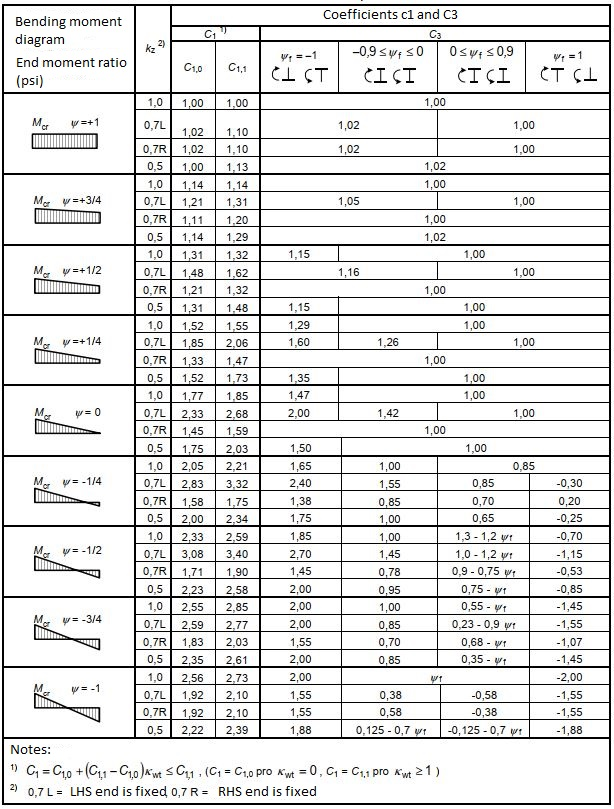

In [217]:
psi_f = 0  # effect of profile assymmetry

In [218]:
kz = 1 # simple support for bending
kw = 1 # warping not prevented
kappa_wt = math.pi / kw / (Lcrz) * math.sqrt(E * Iwc / G / Itc)
zeta_g = math.pi * (1000 * zg) / kz / (Lcrz) * math.sqrt(E * Izc / G / Itc)
zj = 0 # section is symmetric about the y axis, therefore zeta_j is also zero
zeta_j = math.pi * (1000 * zj) / kz / (Lcrz) * math.sqrt(E * Izc / G / Itc)

In [219]:
print("kappa_wt                  = ", ("%2.3f" % kappa_wt), " [-]")
print("zeta_g                    = ", ("%2.3f" % zeta_g), " [-]")
print("zeta_j                    = ", ("%2.3f" % zeta_j), " [-]")

kappa_wt                  =  0.932  [-]
zeta_g                    =  0.000  [-]
zeta_j                    =  0.000  [-]


In [220]:
C10 = 1.77
C11 = 1.85
C1 = C10 + (C11 - C10) * kappa_wt
C2 = 0.55
C3 = 1

In [221]:
print("C1                        = ", ("%2.3f" % C1), " [-]")

C1                        =  1.845  [-]


In [222]:
# Dimensionless critical moment
mu_cr = C1 / kz * (math.sqrt(1 + kappa_wt**2 + (C2 * zeta_g - C3 * zeta_j)**2) - (C2 * zeta_g - C3 * zeta_j))
M_cr = (mu_cr * math.pi * math.sqrt(E * Izc * G * Itc) / (1000 * Lcrz)) / 1000000
# The relative slenderness
lambda_LT_dash = math.sqrt(Wyc / 10**(9) * fy / (M_cr))

In [223]:
print("mu_cr                     = ", ("%2.3f" % mu_cr), " [-]")
print("M_cr                      = ", ("%2.3f" % M_cr), " [kNm]")
print("lambda_LT_dash            = ", ("%2.3f" % lambda_LT_dash), " [-]")

mu_cr                     =  2.522  [-]
M_cr                      =  264.370  [kNm]
lambda_LT_dash            =  0.761  [-]


In [224]:
curve = "B"
# imperfection factor
alphaLT=0.8 
if curve == "A0":
    alphaLT=0.13
if curve == "A":
    alphaLT=0.21
if curve == "B":
    alphaLT=0.34
if curve == "C":
    alphaLT=0.49
if curve == "D":
    alphaLT=0.76

In [225]:
PHI_LT = 0.5 * (1 + alphaLT * (lambda_LT_dash - 0.2) + lambda_LT_dash**2)
chi_LT = min(1, 1 / (PHI_LT + math.sqrt(PHI_LT**2 - lambda_LT_dash**2)))

In [226]:
print("PHI_LT                    = ", ("%2.3f" % PHI_LT), " [-]")
print("chi_LT                    = ", ("%2.3f" % chi_LT), " [-]")

PHI_LT                    =  0.885  [-]
chi_LT                    =  0.748  [-]


### Interaction of bending moment and axial force

In [227]:
Cmy = 0.9
psi = 0    #Table NB.3.1 of CSN EN 1993-1-1
CmLT = 0.6 + psi * 0.4

In [228]:
NEd =amp * (RA_1 + Tcd)
NRk = Ac / 10**(2) * fy
MEd = amp * (Mca_1 + Mca_2)
MyRk = Wyc / 10**(9) * fy

In [229]:
print("NEd                       = ", ("%2.3f" % NEd), " [kN]")
print("NRk                       = ", ("%2.3f" % NRk), " [kN]")
print("MEd                       = ", ("%2.3f" % MEd), " [kNm]")
print("MyRk                      = ", ("%2.3f" % MyRk), " [kNm]")

NEd                       =  71.357  [kN]
NRk                       =  14797750.000  [kN]
MEd                       =  81.582  [kNm]
MyRk                      =  153.175  [kNm]


In [230]:
kyy = min(Cmy*(1 + (lambda_dash_y - 0.2)* NEd * gammaM1 / chi_y / NRk), Cmy * (1 + 0.8 * NEd * gammaM1 / chi_y / NRk))

In [231]:
print("kyy                       = ", ("%2.3f" % kyy), " [-]")

kyy                       =  0.900  [-]


In [232]:
kzy = max(1 - 0.1 * lambda_dash_z * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRk, 1 - 0.1 * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRk )

In [233]:
print("kzy                       = ", ("%2.3f" % kzy), " [-]")

kzy                       =  1.000  [-]


### M+A Interaction Check

In [234]:
UF1 = NEd * gammaM1 / chi_y / NRk + kyy * MEd * gammaM1 / chi_LT / MyRk
UF2 = NEd * gammaM1 / chi_z / NRk + kzy * MEd * gammaM1 / chi_LT / MyRk

In [235]:
print("UF1                       = ", ("%2.3f" % UF1), " [-]")
print("UF2                       = ", ("%2.3f" % UF2), " [-]")

UF1                       =  0.641  [-]
UF2                       =  0.712  [-]
